# Comparison of channel simulations with and without ANN

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid

In [2]:
path_noGM_seamount = '/home/db194/scratch_db194/mom6/apr2025/MOM6_channel_p25_topo_noGM_test_speed/'
path_ANN_seamount = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/MOM6_channel_p25_topo_ANN_from_restart/'
path_ANN_seamount_FGNV = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/MOM6_channel_p25_topo_ANN_from_restart_FGNV/'

In [22]:
ds_noGM_seamount = xr.open_mfdataset([path_noGM_seamount + f'prog_{i:05d}.nc' for i in [1401, 1601, 1801]], combine='by_coords').isel(xq=slice(1,None), yq=slice(1,None))
ds_ANN_seamount = xr.open_mfdataset([path_ANN_seamount + f'prog_{i:05d}.nc' for i in [4401, 4601, 4801]], combine='by_coords').isel(xq=slice(1,None), yq=slice(1,None))
ds_ANN_seamount_FGNV = xr.open_mfdataset([path_ANN_seamount_FGNV + f'prog_{i:05d}.nc' for i in [4401, 4601, 4801]], combine='by_coords').isel(xq=slice(1,None), yq=slice(1,None))

In [23]:
dsz_noGM_seamount = xr.open_mfdataset([path_noGM_seamount + f'prog_z_{i:05d}.nc' for i in [1401, 1601, 1801]], combine='by_coords').isel(xq=slice(1,None), yq=slice(1,None))
dsz_ANN_seamount = xr.open_mfdataset([path_ANN_seamount + f'prog_z_{i:05d}.nc' for i in [4401, 4601, 4801]], combine='by_coords').isel(xq=slice(1,None), yq=slice(1,None))
dsz_ANN_seamount_FGNV = xr.open_mfdataset([path_ANN_seamount_FGNV + f'prog_z_{i:05d}.nc' for i in [4401, 4601, 4801]], combine='by_coords').isel(xq=slice(1,None), yq=slice(1,None))

In [6]:
#os_noGM_seamount = xr.open_dataset(path_noGM_seamount + 'ocean.stats.nc')
#os_ANN_seamount = xr.open_dataset(path_ANN_seamount + 'ocean.stats.nc')
#os_ANN_seamount_FGNV = xr.open_dataset(path_ANN_seamount_FGNV + 'ocean.stats.nc')

# OS files got corrupted due to restarts. Not using them for now.

## Snapshots and movies

In [24]:
def add_vorticity( ds ):
    grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                            'Y': {'center': 'yh', 'right': 'yq'},
                            'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

    v_x = grid.diff(ds['v'], 'X') / grid.diff(ds['xh'], 'X')/110574/np.cos(np.deg2rad(ds['yq']))  # convert to meters
    u_y = grid.diff(ds['u'], 'Y', boundary='extend') / grid.diff(ds['yh'], 'Y')/110574  # convert to meters

    vort = v_x - u_y
    ds['vort'] = vort

    return ds

In [25]:
dsz_GM_seamount = add_vorticity(dsz_noGM_seamount)
dsz_ANN_seamount = add_vorticity(dsz_ANN_seamount)
dsz_ANN_seamount_FGNV = add_vorticity(dsz_ANN_seamount_FGNV)

/ext3/miniconda3/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/ext3/miniconda3/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/ext3/miniconda3/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent 

In [26]:
def plot(idT=-1):

    plt.figure(figsize=(12,9))

    plt.subplot(3,3,1)
    ds_noGM_seamount.ssh.isel(Time=idT).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
    plt.title('No GM SSH')

    plt.subplot(3,3,2)
    ds_ANN_seamount.ssh.isel(Time=idT).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
    plt.title('ANN SSH')

    plt.subplot(3,3,3)
    ds_ANN_seamount_FGNV.ssh.isel(Time=idT).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
    plt.title('ANN FGNV SSH')

    plt.subplot(3,3,4)
    dsz_noGM_seamount.temp.isel(Time=idT, z_l=2).plot(vmin=0.5, vmax=6)
    plt.title('No GM - SST')

    plt.subplot(3,3,5)
    dsz_ANN_seamount.temp.isel(Time=idT, z_l=2).plot(vmin=0.5, vmax=6)
    plt.title('ANN - SST')

    plt.subplot(3,3,6)
    dsz_ANN_seamount_FGNV.temp.isel(Time=idT, z_l=2).plot(vmin=0.5, vmax=6)
    plt.title('ANN FGNV - SST')

    plt.subplot(3,3,7)
    dsz_GM_seamount.vort.isel(Time=idT, z_l=0).plot(vmin=-1e-5)
    plt.title('No GM - Vorticity')

    plt.subplot(3,3,8)
    dsz_ANN_seamount.vort.isel(Time=idT, z_l=0).plot(vmin=-1e-5)
    plt.title('ANN - Vorticity')

    plt.subplot(3,3,9)
    dsz_ANN_seamount_FGNV.vort.isel(Time=idT, z_l=0).plot(vmin=-1e-5)
    plt.title('ANN FGNV - Vorticity')

    plt.tight_layout()


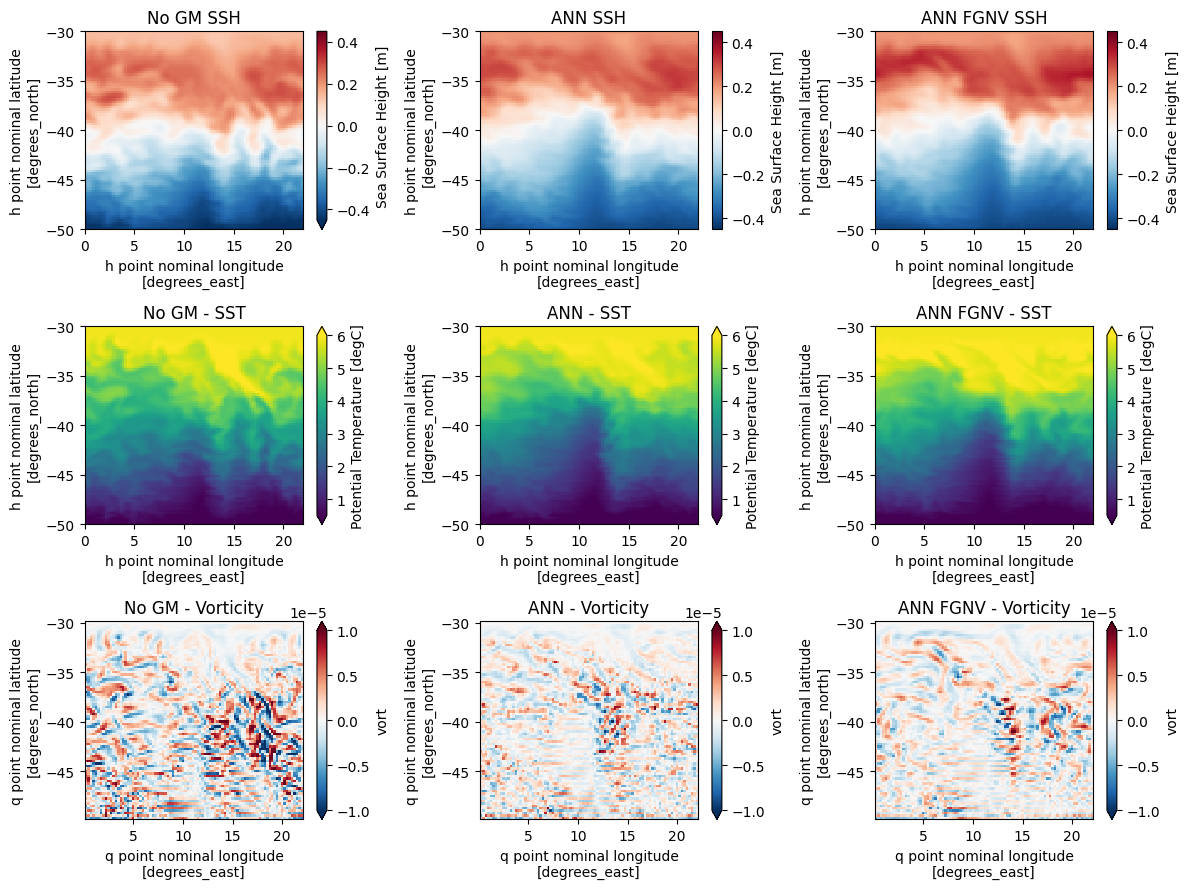

In [27]:
plot()

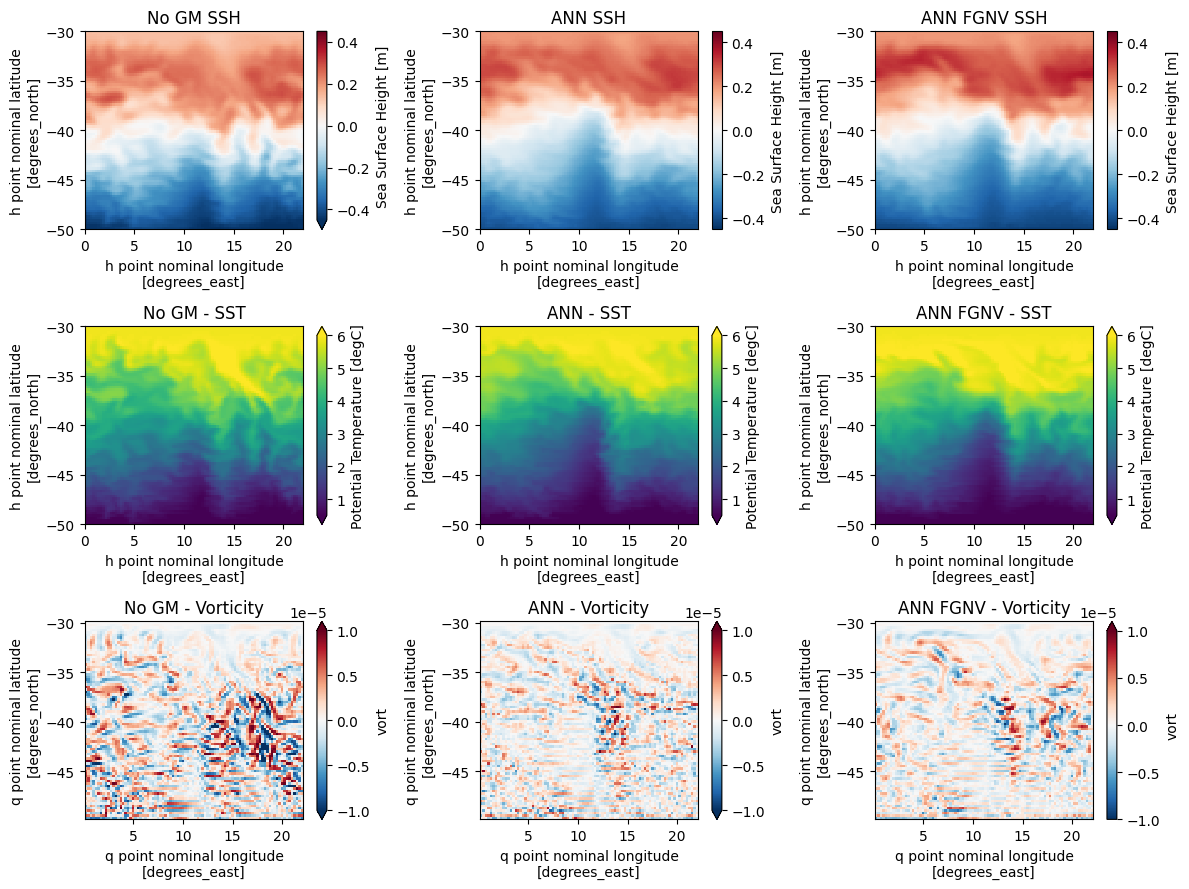

In [28]:
plot(595)

In [18]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [29]:
create_animation(plot, range(0,600,5), 'channel_movie.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 20.0 seconds


## Mean state

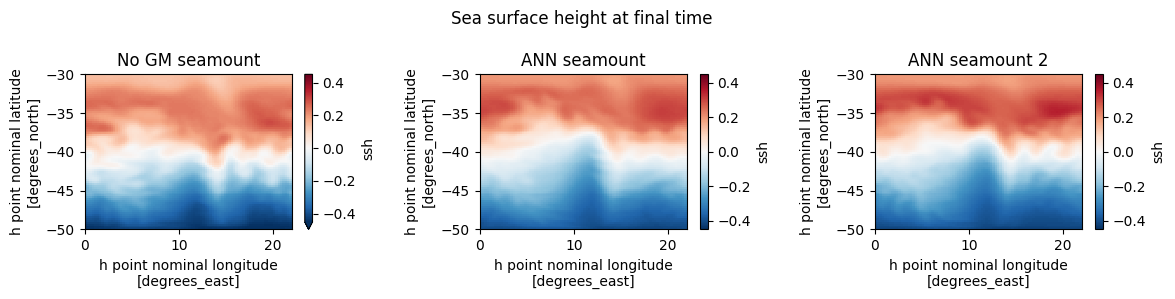

In [44]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
ds_noGM_seamount.ssh.mean('Time').plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('No GM seamount')

plt.subplot(1,3,2)
ds_ANN_seamount.ssh.mean('Time').plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('ANN seamount')

plt.subplot(1,3,3)
ds_ANN_seamount_FGNV.ssh.mean('Time').plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('ANN seamount 2')

plt.suptitle('Sea surface height at final time')
plt.tight_layout()
#dsz_noGM_seamount.temp.isel(Time=-1, z_l=2).plot()

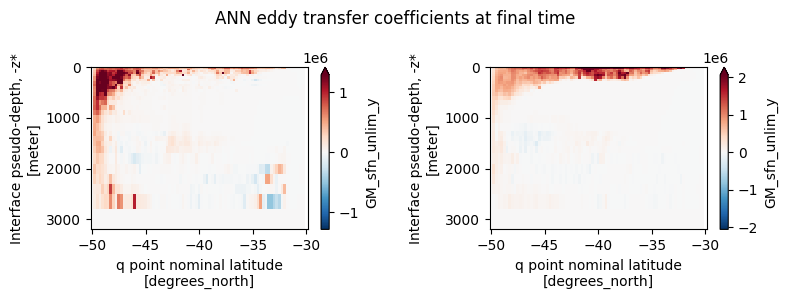

In [12]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
ds_ANN_seamount.GM_sfn_unlim_y.mean(dim=['Time', 'xh']).plot(robust=True)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
ds_ANN_seamount_FGNV.GM_sfn_unlim_y.mean(dim=['Time', 'xh']).plot(robust=True)
plt.gca().invert_yaxis()

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()

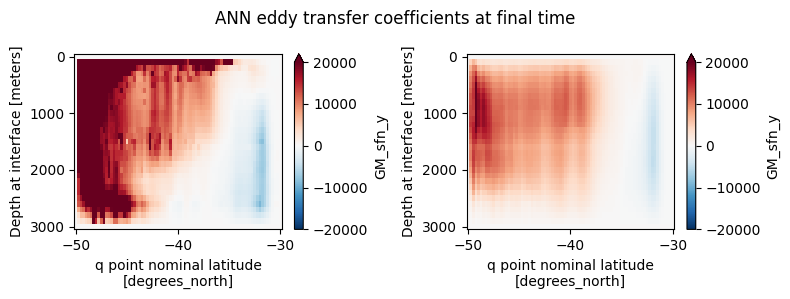

In [22]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.GM_sfn_y.mean(dim=['Time', 'xh']).plot(robust=True, vmin=-2e4)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.GM_sfn_y.mean(dim=['Time', 'xh']).plot(robust=True, vmin=-2e4)
plt.gca().invert_yaxis()

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()

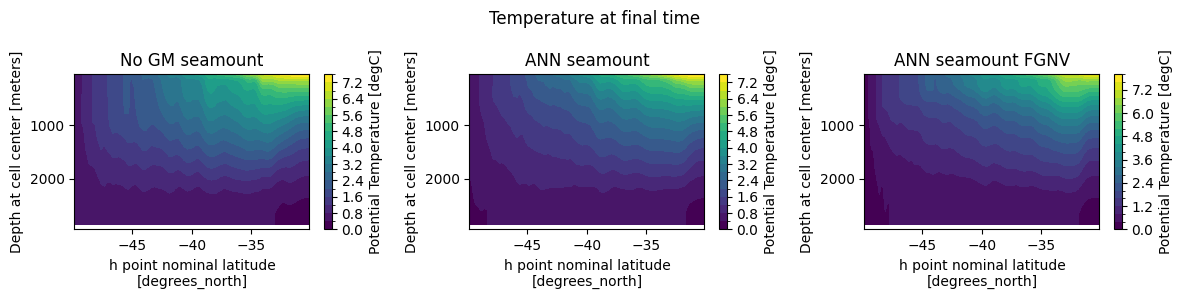

In [14]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
dsz_noGM_seamount.temp.isel(Time=-1, xh=20).plot.contourf(levels=21)
plt.gca().invert_yaxis()
plt.title('No GM seamount')

plt.subplot(1,3,2)
dsz_ANN_seamount.temp.isel(Time=-1, xh=20).plot.contourf(levels=21)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,3,3)
dsz_ANN_seamount_FGNV.temp.isel(Time=-1, xh=20).plot.contourf(levels=21)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('Temperature at final time')
plt.tight_layout()

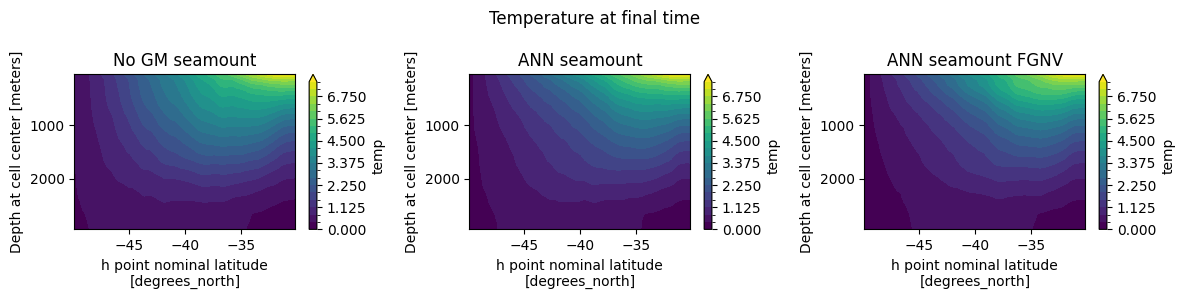

In [17]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
dsz_noGM_seamount.temp.isel(Time=-1).mean(dim='xh').plot.contourf(vmin=0, vmax=7.5, levels=21)
plt.gca().invert_yaxis()
plt.title('No GM seamount')

plt.subplot(1,3,2)
dsz_ANN_seamount.temp.isel(Time=-1).mean(dim='xh').plot.contourf(vmin=0, vmax=7.5, levels=21)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,3,3)
dsz_ANN_seamount_FGNV.temp.isel(Time=-1).mean(dim='xh').plot.contourf(vmin=0, vmax=7.5, levels=21)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('Temperature at final time')
plt.tight_layout()

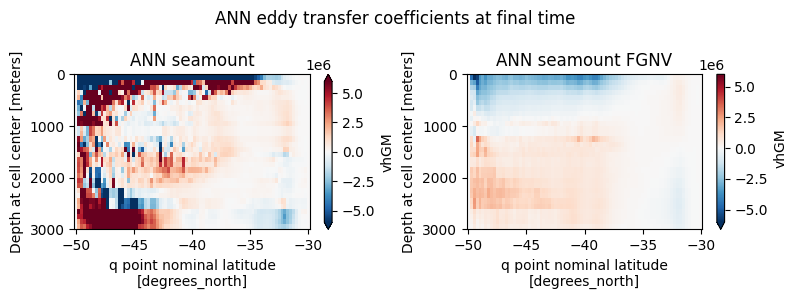

In [23]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time', 'xh']).plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time', 'xh']).plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


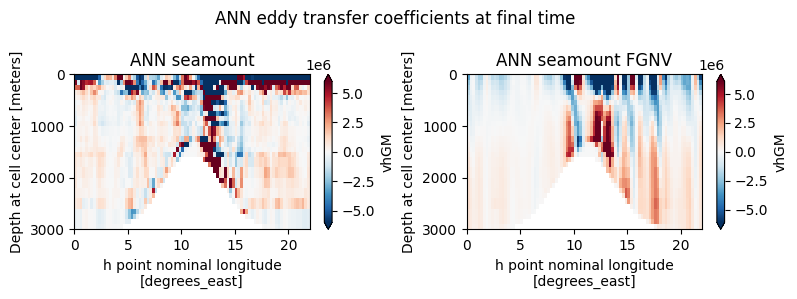

In [20]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time']).sel(yq=-40, method='nearest').plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time']).sel(yq=-40, method='nearest').plot(robust=True)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


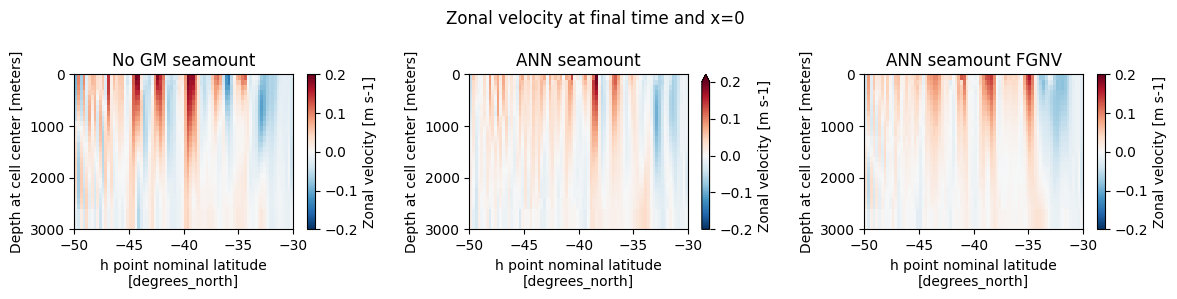

In [30]:
plt.figure(figsize=(12, 3))

plt.subplot(1,3,1)
dsz_noGM_seamount.u.isel(Time=-1).sel(xq=0, method='nearest').plot(vmin=-0.2)
plt.gca().invert_yaxis()
plt.title('No GM seamount')

plt.subplot(1,3,2)
dsz_ANN_seamount.u.isel(Time=-1).sel(xq=0, method='nearest').plot(vmin=-0.2)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,3,3)
dsz_ANN_seamount_FGNV.u.isel(Time=-1).sel(xq=0, method='nearest').plot(vmin=-0.2)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')
plt.suptitle('Zonal velocity at final time and x=0')
plt.tight_layout()


In [31]:
import xrft

In [46]:
ps_v_noGM = xrft.power_spectrum(dsz_noGM_seamount.v, dim=['xh']) 
ps_v_ANN = xrft.power_spectrum(dsz_ANN_seamount.v, dim=['xh'])
ps_v_ANN_FGNV = xrft.power_spectrum(dsz_ANN_seamount_FGNV.v, dim=['xh'])

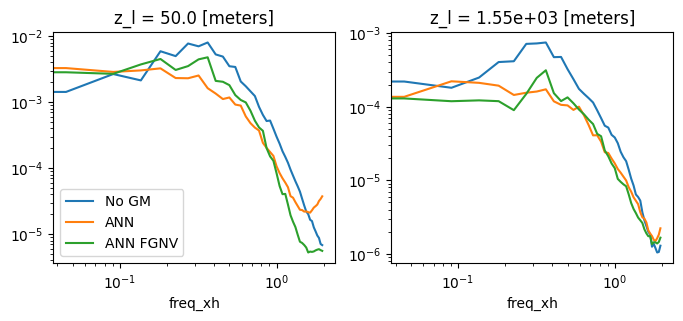

In [47]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
ps_v_noGM.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='No GM')
ps_v_ANN.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN')
ps_v_ANN_FGNV.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN FGNV')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.subplot(1,2,2)
ps_v_noGM.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='No GM')
ps_v_ANN.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN')
ps_v_ANN_FGNV.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN FGNV')

plt.xscale('log')
plt.yscale('log')
